In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.cluster import KMeans
import folium
import requests
%matplotlib inline
!conda install -c conda-forge folium=0.5.0 --yes
!pip install xlrd

import xlrd
import csv

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

     |████████████████████████████████| 112kB 24.9MB/s eta 0:00:01
Libraries imported.


# Problem
Imagine that an investment group wants to invest in a successful business in Portugal to take advantage of the growth of tourism. The aim of the project will be to answer the following questions:

1. What kinds of businesses the cities already offer?
2. In which cities they could invest?
3. What kind of investment should the investment group make??

This project will be based on the segmentation and description of each city with the most visitors. 
The cities will be characterized according to the different types of commercial establishments (venues). Finally there will be a reflection and discussion on what kind of investment could be made and in which cities this investment should be made in order to maximize its potential. To achieve the three main goals I will use some techniques of data cleaning, data processing, data visualization and machine learning.

# Data acquisition and cleaning

In [2]:
pwd

'/resources/labs/Portugal capstone'

 Import the dataset with the  number of hotels and total accommodations of all cities, Districts and maior regions fo Portugal.
From this Dataset I want to know which cities have the most number of hotels. 
I Will choose 20 cities.

In [3]:
num_alo= pd.read_excel("num_alo3.xlsx")

In [4]:
num_alo=num_alo.rename(columns={'Âmbito Geográfico':'Denomination','Região':'Cities', 'Total':'Nº accommodations', 'Hotéis':'Hotels'})
num_alo.head(5)

,Denomination,Cities,Nº accommodations,Hotels
0,NUTS 2013,Portugal,6868,1400
1,NUTS I,Continente,4963,1242
2,NUTS II,Norte,1438,363
3,NUTS III,Alto Minho,242,44
4,Município,Arcos de Valdevez,36,4


In [5]:
num_alo= num_alo.fillna(0)
print(num_alo.shape)
num_alo.head(5)

(353, 4)


,Denomination,Cities,Nº accommodations,Hotels
0,NUTS 2013,Portugal,6868,1400
1,NUTS I,Continente,4963,1242
2,NUTS II,Norte,1438,363
3,NUTS III,Alto Minho,242,44
4,Município,Arcos de Valdevez,36,4


In [6]:
num_alo.dtypes

Denomination         object
Cities               object
Nº accommodations     int64
Hotels                int64
dtype: object

In [7]:
num_alo.astype({'Nº accommodations':'int','Hotels':'int'}).dtypes

Denomination         object
Cities               object
Nº accommodations     int64
Hotels                int64
dtype: object

In [8]:
Major=num_alo.sort_values('Hotels', ascending=False)
Major=Major.drop_duplicates(subset='Cities', keep='first')
df=Major[Major.Denomination == "Município"]
df.head(20)


,Denomination,Cities,Nº accommodations,Hotels
213,Município,Lisboa,576,189
38,Município,Porto,281,89
183,Município,Ourém,89,54
343,Município,Funchal,724,43
292,Município,Albufeira,209,42
212,Município,Cascais,82,27
315,Município,Ponta Delgada,93,24
17,Município,Braga,43,24
299,Município,Loulé,102,22
302,Município,Portimão,85,20


In [9]:
df.shape

(308, 4)

In [10]:
df2=Major[Major.Denomination == "NUTS III"]
df2.head()

,Denomination,Cities,Nº accommodations,Hotels
207,NUTS III,Área Metropolitana de Lisboa,908,276
30,NUTS III,Área Metropolitana do Porto,453,162
291,NUTS III,Algarve,817,158
176,NUTS III,Médio Tejo,189,78
340,NUTS III,Ilha da Madeira,1470,76


# Project - Compare the 20 Cities with more tourism in Portugal.

In the Major table I have Districts and Cities. So I will choose to this project the 20 cities with more Hotels as index to choose the Cities.

In [11]:
City= df.drop(df.columns[[0,2]], axis=1)
City=City.head(21)
City
Cidades=City.reset_index(drop=True, inplace=False)
Cidades

,Cities,Hotels
0,Lisboa,189
1,Porto,89
2,Ourém,54
3,Funchal,43
4,Albufeira,42
5,Cascais,27
6,Ponta Delgada,24
7,Braga,24
8,Loulé,22
9,Portimão,20


In [12]:
df_cidades=Cidades
df_cidades= df_cidades.set_index('Cities')

In [13]:
import matplotlib.pyplot  as plt

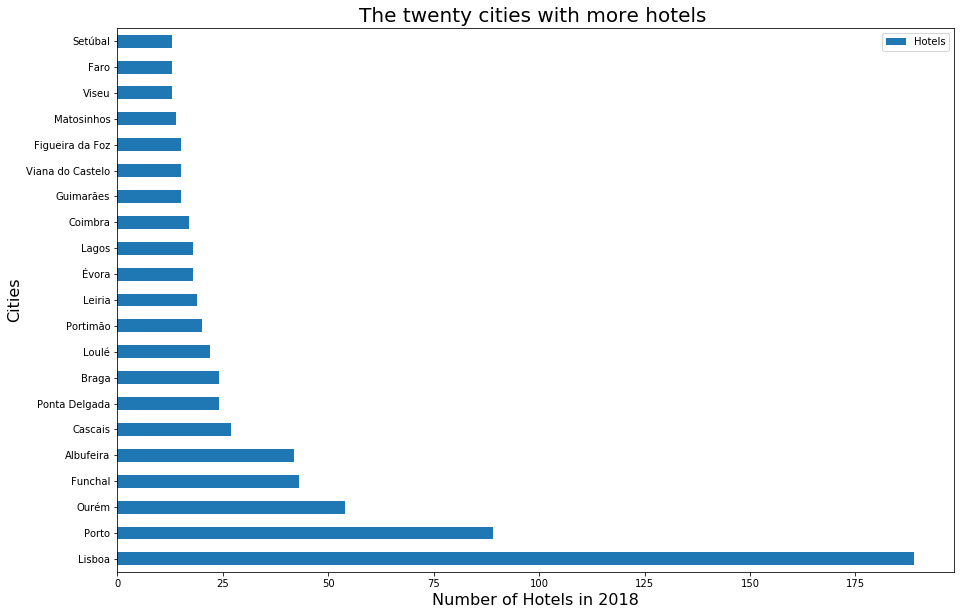

In [14]:
df_cidades.plot.barh(figsize=(15, 10))
plt.title('The twenty cities with more hotels ', fontsize=20 )
plt.ylabel('Cities',fontsize=16)
plt.xlabel('Number of Hotels in 2018', fontsize=16)
plt.savefig('Fig1.jpg')

# Finding the coordinates of the 20 cities

In [15]:
!conda install -c conda-forge geopy --yes 
!pip install geocoder
from geopy.geocoders import Nominatim
!pip install geopandas
!pip install geopy


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 

In [16]:
# Test Location
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Praça do Municipio, lisboa')
print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

Latitude = 38.708066, Longitude = -9.13913439292238


In [17]:
# I create a loop to fill the table Cidades with the cities coordenates, 
#so I need to create 2 more  columns

latitude_values = []
longitude_values = []
for n, row in Cidades.iterrows():
    location = locator.geocode(row['Cities'], 'Portugal')
    latitude_values.append(location.latitude)
    longitude_values.append(location.longitude)
    

Cidades['latitude'] = latitude_values
Cidades['longitude'] = longitude_values

In [18]:
Cidades

,Cities,Hotels,latitude,longitude
0,Lisboa,189,38.707751,-9.136592
1,Porto,89,41.149451,-8.610788
2,Ourém,54,39.687293,-8.567930
3,Funchal,43,32.649650,-16.908678
4,Albufeira,42,37.144524,-8.214588
5,Cascais,27,38.722400,-9.396909
6,Ponta Delgada,24,37.739434,-25.668362
7,Braga,24,41.551058,-8.428005
8,Loulé,22,37.214275,-8.086524
9,Portimão,20,37.194210,-8.585577


In [19]:
# Some coordinates are wrong, I will fixit. 
Cidades.iloc[4, Cidades.columns.get_loc('latitude'),]=37.089506 
Cidades.iloc[0, Cidades.columns.get_loc('latitude'),]=38.725147
Cidades.iloc[8, Cidades.columns.get_loc('latitude'),]=37.079227
Cidades.iloc[9, Cidades.columns.get_loc('latitude'),]=37.126283
Cidades.iloc[2, Cidades.columns.get_loc('latitude'),]=39.633666
Cidades.iloc[20, Cidades.columns.get_loc('latitude'),]=38.52341
Cidades.iloc[5, Cidades.columns.get_loc('latitude'),]=38.696812
Cidades.iloc[12, Cidades.columns.get_loc('latitude'),]=37.099555
Cidades.iloc[19, Cidades.columns.get_loc('latitude'),]=37.019869

Cidades.iloc[4, Cidades.columns.get_loc('longitude'),]=-8.246843
Cidades.iloc[0, Cidades.columns.get_loc('longitude'),]=-9.1449973
Cidades.iloc[8, Cidades.columns.get_loc('longitude'),]=-8.110704
Cidades.iloc[9, Cidades.columns.get_loc('longitude'),]=-8.538482
Cidades.iloc[2, Cidades.columns.get_loc('longitude'),]=-8.670023
Cidades.iloc[20, Cidades.columns.get_loc('longitude'),]=-8.894496
Cidades.iloc[5, Cidades.columns.get_loc('longitude'),]=-9.424695
Cidades.iloc[12, Cidades.columns.get_loc('longitude'),]=-8.676873
Cidades.iloc[19, Cidades.columns.get_loc('longitude'),]=-7.929246

Cidades= Cidades.drop([17], axis=0)


In [20]:
Cidades


,Cities,Hotels,latitude,longitude
0,Lisboa,189,38.725147,-9.144997
1,Porto,89,41.149451,-8.610788
2,Ourém,54,39.633666,-8.670023
3,Funchal,43,32.649650,-16.908678
4,Albufeira,42,37.089506,-8.246843
5,Cascais,27,38.696812,-9.424695
6,Ponta Delgada,24,37.739434,-25.668362
7,Braga,24,41.551058,-8.428005
8,Loulé,22,37.079227,-8.110704
9,Portimão,20,37.126283,-8.538482


# Portugal Map

In [21]:
latitude=38.707751
longitude=-7.00
#  Map of Portugal using latitude and longitude values
map_Portugal = folium.Map(location=[latitude, longitude], zoom_start=7)

# add markers to map
for lat, lng, citie in zip(Cidades['latitude'], Cidades['longitude'], Cidades['Cities']):
    label = '{}'.format(citie)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Portugal)  
    
map_Portugal

In [22]:
import json
from pandas.io.json import json_normalize

In [23]:
Cidades.dtypes

Cities        object
Hotels         int64
latitude     float64
longitude    float64
dtype: object

In [24]:
CLIENT_ID = 'G0IMCUAWOZUTCEEX4ZCEKFEOSNR0F00QQDTHXSVQCTIUVNTV' 
CLIENT_SECRET = 'ZTE3WKRZGW20MEFSKP3U2DB2JE1B0OGA5MEA2BXREZ1TQIYN' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G0IMCUAWOZUTCEEX4ZCEKFEOSNR0F00QQDTHXSVQCTIUVNTV
CLIENT_SECRET:ZTE3WKRZGW20MEFSKP3U2DB2JE1B0OGA5MEA2BXREZ1TQIYN


In [25]:
# Test the coordenates
City_lat=Cidades.loc[12, 'latitude']
City_lon=Cidades.loc[12, 'longitude']
City=Cidades.loc[12, 'Cities']

print("The Location of {} are {}, {}.".format(City, City_lat, City_lon))

The Location of Lagos are 37.099555, -8.676873.


In [26]:
radius = 3000
LIMIT = 200

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, City_lat, City_lon, VERSION, radius, LIMIT)
results = requests.get(url).json()

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
venues = results['response']['groups'][0]['items']
    
City_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
City_venues =City_venues.loc[:, filtered_columns]

# filter the category for each row
City_venues['venue.categories'] = City_venues.apply(get_category_type, axis=1)

# clean columns
City_venues.columns = [col.split(".")[-1] for col in City_venues.columns]

City_venues.shape

(100, 4)

In [29]:
City_venues

,name,categories,lat,lng
0,Casa Mãe,Resort,37.103160,-8.675444
1,Pro Putting Garden,Mini Golf,37.097574,-8.673841
2,Ol' Bastard's,Fish & Chips Shop,37.100300,-8.672826
3,Goji,Lounge,37.101067,-8.674296
4,Dos Artistas,Portuguese Restaurant,37.100917,-8.673181
...,...,...,...,...
95,Endless Summer,Gastropub,37.086839,-8.727794
96,Burgau,Outdoors & Recreation,37.072818,-8.773162
97,Praia do Burgau,Beach,37.072337,-8.775072
98,Espiche Golf,Golf Course,37.111034,-8.745845


In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        PT_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        PT_venues.columns = ['Cities', 'Cities Latitude', 'Cities Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(PT_venues)

In [31]:
PT_venues= getNearbyVenues(Cidades['Cities'], Cidades['latitude'], Cidades['longitude'])

Lisboa
Porto
Ourém
Funchal
Albufeira
Cascais
Ponta Delgada
Braga
Loulé
Portimão
Leiria
Évora
Lagos
Coimbra
Guimarães
Viana do Castelo
Figueira da Foz
Viseu
Faro
Setúbal


The result of the number of venues found changed always a new request was made.
 

In [33]:
print (PT_venues.shape)
PT_venues.head(1500)

(1705, 7)


,Cities,Cities Latitude,Cities Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lisboa,38.725147,-9.144997,Hotel H10 Duque de Loulé,38.726364,-9.147198,Hotel
1,Lisboa,38.725147,-9.144997,Olá Nepal,38.725346,-9.145956,Himalayan Restaurant
2,Lisboa,38.725147,-9.144997,Rubro,38.722319,-9.146024,Spanish Restaurant
3,Lisboa,38.725147,-9.144997,O Forninho Saloio,38.722544,-9.145027,Portuguese Restaurant
4,Lisboa,38.725147,-9.144997,Marquês de Pombal,38.725588,-9.149445,Plaza
...,...,...,...,...,...,...,...
1495,Viseu,40.657471,-7.913866,Vitaminas,40.643184,-7.911422,Salad Place
1496,Viseu,40.657471,-7.913866,Hotel Durão,40.673210,-7.921366,Bed & Breakfast
1497,Viseu,40.657471,-7.913866,Vinyl Bar,40.646605,-7.918409,Bar
1498,Viseu,40.657471,-7.913866,Continente,40.673023,-7.919440,Supermarket


In [34]:
PT_venues.groupby(['Venue Category']).size()

Venue Category
American Restaurant               1
Arepa Restaurant                  1
Argentinian Restaurant            2
Art Gallery                       4
Art Museum                        2
                                 ..
Train Station                     3
Vegetarian / Vegan Restaurant    13
Water Park                        1
Wine Bar                         15
Wings Joint                       1
Length: 173, dtype: int64

In [35]:
PT_venues.groupby(['Cities']).size()

Cities
Albufeira           100
Braga               100
Cascais             100
Coimbra             100
Faro                 62
Figueira da Foz      55
Funchal             100
Guimarães            78
Lagos               100
Leiria               58
Lisboa              100
Loulé                74
Ourém                47
Ponta Delgada        83
Portimão             98
Porto               100
Setúbal             100
Viana do Castelo     82
Viseu               100
Évora                68
dtype: int64

In [36]:
PT=PT_venues
PT.head()

,Cities,Cities Latitude,Cities Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lisboa,38.725147,-9.144997,Hotel H10 Duque de Loulé,38.726364,-9.147198,Hotel
1,Lisboa,38.725147,-9.144997,Olá Nepal,38.725346,-9.145956,Himalayan Restaurant
2,Lisboa,38.725147,-9.144997,Rubro,38.722319,-9.146024,Spanish Restaurant
3,Lisboa,38.725147,-9.144997,O Forninho Saloio,38.722544,-9.145027,Portuguese Restaurant
4,Lisboa,38.725147,-9.144997,Marquês de Pombal,38.725588,-9.149445,Plaza


# Top Categories

In [64]:
# one hot encoding
PT_onehot = pd.get_dummies(PT[['Venue Category']], prefix="", prefix_sep="")

# add cities column back to dataframe
PT_onehot['Cities'] = PT['Cities'] 

# move Cities column to the first column
fixed_columns = [PT_onehot.columns[-1]] + list(PT_onehot.columns[:-1])
PT_onehot = PT_onehot[fixed_columns]

In [65]:
PT_onehot.head()

,Cities,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint
0,Lisboa,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,Lisboa,0,0,0,0,0,0,...,0,0,0,0,0,0,0
2,Lisboa,0,0,0,0,0,0,...,0,0,0,0,0,0,0
3,Lisboa,0,0,0,0,0,0,...,0,0,0,0,0,0,0
4,Lisboa,0,0,0,0,0,0,...,0,0,0,0,0,0,0


In [66]:
PT_grouped = PT_onehot.groupby('Cities').sum().reset_index()
PT_grouped.head()

,Cities,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint
0,Albufeira,0,1,0,0,0,0,...,0,0,0,0,0,0,1
1,Braga,0,0,0,0,1,0,...,0,0,0,3,0,0,0
2,Cascais,0,0,1,0,1,0,...,0,1,0,1,0,1,0
3,Coimbra,0,0,0,1,0,0,...,0,0,0,1,0,1,0
4,Faro,0,0,0,0,0,0,...,0,0,0,0,0,1,0


In [67]:
pd.options.display.max_columns = 180
PT_grouped.head()

,Cities,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Cable Car,Café,Campground,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Cosmetics Shop,Creperie,Cupcake Shop,Dessert Shop,Diner,Dive Bar,Dive Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Lighthouse,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Neighborhood,Nightclub,Nightlife Spot,Noodle House,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Resort,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint
0,Albufeira,0,1,0,0,0,0,0,0,0,0,0,2,10,0,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0,0,0,1,2,0,0,4,1,0,0,1,0,1,0,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,1,0,12,0,0,2,7,0,1,0,0,0,0,1,0,0,4,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Braga,0,0,0,0,1,0,1,0,0,0,0,4,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,6,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,0,0,4,0,0,0,0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,4,0,8,0,0,0,13,1,0,0,0,0,0,1,0,0,0,1,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0,0,1,0,0,0,0,3,0,0,0
2,Cascais,0,0,1,0,1,0,0,0,0,1,0,3,3,1,5,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,3,0,0,0,0,1,7,0,0,0,3,3,0,0,4,1,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,2,1,6,1,0,1,8,0,0,0,0,0,0,1,0,0,5,0,0,3,0,0,0,0,0,0,0,0,0,0,3,1,1,1,2,0,0,0,0,0,0,1,0,1,0,1,0
3,Coimbra,0,0,0,1,0,0,0,0,0,0,0,4,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,7,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,3,1,0,0,1,0,6,0,0,0,1,1,0,0,3,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,4,0,0,1,0,0,1,10,0,16,0,0,0,3,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,1,0,1,0
4,Faro,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,3,0,2,0,0,0,0,0,0,0,1,0,0,1,0,0,2,1

In [68]:
PT_grouped['Portuguese Restaurant'] = PT_grouped['Restaurant'] + PT_grouped ['Portuguese Restaurant'] + PT_grouped['Mediterranean Restaurant']
PT_grouped=PT_grouped.drop(['Restaurant','Mediterranean Restaurant'], axis=1)

In [69]:
print (PT_grouped.shape)
PT_grouped.head()

(20, 172)


,Cities,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Cable Car,Café,Campground,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Cosmetics Shop,Creperie,Cupcake Shop,Dessert Shop,Diner,Dive Bar,Dive Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Lighthouse,Lounge,Market,Mexican Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Neighborhood,Nightclub,Nightlife Spot,Noodle House,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Resort,Road,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint
0,Albufeira,0,1,0,0,0,0,0,0,0,0,0,2,10,0,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0,0,0,1,2,0,0,4,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,1,0,23,0,0,2,0,1,0,0,0,0,1,0,0,4,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Braga,0,0,0,0,1,0,1,0,0,0,0,4,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,6,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,0,0,4,0,0,0,0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,4,0,21,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0,0,1,0,0,0,0,3,0,0,0
2,Cascais,0,0,1,0,1,0,0,0,0,1,0,3,3,1,5,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,3,0,0,0,0,1,7,0,0,0,3,3,0,0,4,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,2,1,15,1,0,1,0,0,0,0,0,0,1,0,0,5,0,0,3,0,0,0,0,0,0,0,0,0,0,3,1,1,1,2,0,0,0,0,0,0,1,0,1,0,1,0
3,Coimbra,0,0,0,1,0,0,0,0,0,0,0,4,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,7,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,3,1,0,0,1,0,6,0,0,0,1,1,0,0,3,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,4,0,0,1,0,0,1,10,0,19,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,1,0,1,0
4,Faro,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,3,0,2,0,0,0,0,0,0,0,1,0,0,1,0,0,2,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,

In [70]:
PT_grouped['Asian Restaurant']=PT_grouped['Asian Restaurant'] + PT_grouped['Chinese Restaurant'] + PT_grouped['Himalayan Restaurant'] + PT_grouped['Indian Restaurant'] + PT_grouped['Japanese Restaurant'] + PT_grouped['Sushi Restaurant'] + PT_grouped['Thai Restaurant']
PT_grouped['Fast Food Restaurant']=PT_grouped['Burger Joint'] + PT_grouped['BBQ Joint'] + PT_grouped['Fried Chicken Joint'] + PT_grouped ['Pizza Place'] + PT_grouped['Fast Food Restaurant']

PT_grouped=PT_grouped.drop(['Chinese Restaurant','Himalayan Restaurant', 'Indian Restaurant', 'Japanese Restaurant' , 'Sushi Restaurant', 'Thai Restaurant', 'Burger Joint','Fried Chicken Joint', 'Pizza Place', 'BBQ Joint' ], axis=1)

In [71]:
PT_grouped['Café'] = PT_grouped['Café'] + PT_grouped['Coffee Shop']
PT_grouped=PT_grouped.drop(['Coffee Shop'],axis=1)

In [72]:
print (PT_grouped.shape)
pd.options.display.max_columns = 15
PT_grouped.head(5)

(20, 161)


,Cities,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint
0,Albufeira,0,1,0,0,0,0,...,0,0,0,0,0,0,1
1,Braga,0,0,0,0,1,0,...,0,0,0,3,0,0,0
2,Cascais,0,0,1,0,1,0,...,0,1,0,1,0,1,0
3,Coimbra,0,0,0,1,0,0,...,0,0,0,1,0,1,0
4,Faro,0,0,0,0,0,0,...,0,0,0,0,0,1,0


In [115]:
# Top Categories
bb=pd.DataFrame(columns= None)
bb=PT_grouped.sum(axis=0)
bb=bb.drop('Cities')
bb=bb.sort_values(ascending = False)
bb=bb.head(15)
bb.tolist
bb

Portuguese Restaurant    320
Café                     118
Hotel                    112
Bar                       90
Fast Food Restaurant      83
Bakery                    52
Asian Restaurant          51
Seafood Restaurant        49
Plaza                     45
Beach                     45
Italian Restaurant        31
Park                      29
Historic Site             28
Ice Cream Shop            28
Tapas Restaurant          26
dtype: object

In [116]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [117]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Cities']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
PT_venues_sorted = pd.DataFrame(columns=columns)
PT_venues_sorted['Cities'] = PT_grouped['Cities']

for ind in np.arange(PT_grouped.shape[0]):
    PT_venues_sorted.iloc[ind, 1:] = return_most_common_venues(PT_grouped.iloc[ind, :], num_top_venues)



In [118]:
PT_venues_sorted.head(21)

,Cities,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albufeira,Portuguese Restaurant,Hotel,Bar,Beach,Italian Restaurant,Café,Seafood Restaurant,Asian Restaurant,Cocktail Bar,Fast Food Restaurant
1,Braga,Portuguese Restaurant,Bar,Café,Asian Restaurant,Hotel,Bakery,Plaza,Vegetarian / Vegan Restaurant,Italian Restaurant,Fast Food Restaurant
2,Cascais,Portuguese Restaurant,Hotel,Asian Restaurant,Seafood Restaurant,Beach,Italian Restaurant,Historic Site,Café,Fast Food Restaurant,Ice Cream Shop
3,Coimbra,Portuguese Restaurant,Plaza,Café,Hotel,Bar,Tapas Restaurant,Park,Bakery,Italian Restaurant,Historic Site
4,Faro,Portuguese Restaurant,Fast Food Restaurant,Bakery,Hostel,Hotel,Beer Bar,Lounge,Tapas Restaurant,Bar,Supermarket
5,Figueira da Foz,Café,Portuguese Restaurant,Fast Food Restaurant,Beach,Hotel,Tapas Restaurant,Bar,Ice Cream Shop,Historic Site,Park
6,Funchal,Portuguese Restaurant,Hotel,Café,Bakery,Bar,Asian Restaurant,Fast Food Restaurant,Plaza,Italian Restaurant,Seafood Restaurant
7,Guimarães,Portuguese Restaurant,Bar,Hotel,Plaza,Café,Historic Site,Asian Restaurant,Performing Arts Venue,Electronics Store,Brewery
8,Lagos,Portuguese Restaurant,Beach,Resort,Hotel,Fast Food Restaurant,Seafood Restaurant,Bar,Grocery Store,Supermarket,Café
9,Leiria,Portuguese Restaurant,Café,Fast Food Restaurant,Asian Restaurant,Plaza,Seafood Restaurant,Bar,Lounge,Electronics Store,Castle


# Cluster the Cities

In [119]:
# K-means
PT_KM=PT_grouped.drop('Cities',1)
inertia= []
for i in range (1,11):
    k_means=KMeans(
                init="k-means++",
                n_clusters=i)
    k_means.fit(PT_KM)
    inertia.append((i, k_means.inertia_, ))
    

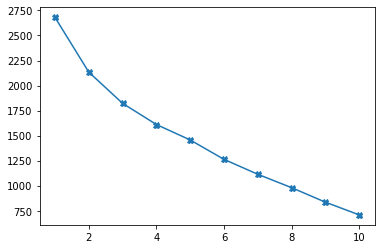

In [120]:
import matplotlib.pyplot as plt
plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")

In [121]:
k_means=KMeans(init="k-means++", n_clusters=2, n_init=12)
k_means.fit(PT_KM)
k_means_label=k_means.labels_


In [122]:
k_means_label

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0],
      dtype=int32)

When the code is run, the Cluster label can turn between 0 and 1, but the result is the same.

In [123]:
PT_KM1=PT_KM.insert(0,'Cluster', k_means_label )
PT_venues_sorted.insert(0,'Cluster', k_means_label )

In [82]:
PT_venues_sorted.head(20)


,Cluster,Cities,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Albufeira,Portuguese Restaurant,Hotel,Bar,Beach,Italian Restaurant,Café,Seafood Restaurant,Asian Restaurant,Cocktail Bar,Fast Food Restaurant
1,1,Braga,Portuguese Restaurant,Bar,Café,Asian Restaurant,Hotel,Bakery,Plaza,Vegetarian / Vegan Restaurant,Italian Restaurant,Fast Food Restaurant
2,1,Cascais,Portuguese Restaurant,Hotel,Asian Restaurant,Seafood Restaurant,Beach,Italian Restaurant,Historic Site,Café,Fast Food Restaurant,Ice Cream Shop
3,1,Coimbra,Portuguese Restaurant,Plaza,Café,Hotel,Bar,Tapas Restaurant,Park,Bakery,Italian Restaurant,Historic Site
4,0,Faro,Portuguese Restaurant,Fast Food Restaurant,Bakery,Hostel,Hotel,Beer Bar,Lounge,Tapas Restaurant,Bar,Supermarket
5,0,Figueira da Foz,Café,Portuguese Restaurant,Fast Food Restaurant,Beach,Hotel,Tapas Restaurant,Bar,Ice Cream Shop,Historic Site,Park
6,1,Funchal,Portuguese Restaurant,Hotel,Café,Bakery,Bar,Asian Restaurant,Fast Food Restaurant,Plaza,Italian Restaurant,Seafood Restaurant
7,1,Guimarães,Portuguese Restaurant,Bar,Hotel,Plaza,Café,Historic Site,Asian Restaurant,Performing Arts Venue,Electronics Store,Brewery
8,1,Lagos,Portuguese Restaurant,Beach,Resort,Hotel,Fast Food Restaurant,Seafood Restaurant,Bar,Grocery Store,Supermarket,Café
9,0,Leiria,Portuguese Restaurant,Café,Fast Food Restaurant,Asian Restaurant,Plaza,Seafood Restaurant,Bar,Lounge,Electronics Store,Castle


In [83]:
PT_venues_sorted.reset_index
PT_venues_sorted.set_index('Cities', inplace=False)
PT_venues_sorted.head()

,Cluster,Cities,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Albufeira,Portuguese Restaurant,Hotel,Bar,Beach,Italian Restaurant,Café,Seafood Restaurant,Asian Restaurant,Cocktail Bar,Fast Food Restaurant
1,1,Braga,Portuguese Restaurant,Bar,Café,Asian Restaurant,Hotel,Bakery,Plaza,Vegetarian / Vegan Restaurant,Italian Restaurant,Fast Food Restaurant
2,1,Cascais,Portuguese Restaurant,Hotel,Asian Restaurant,Seafood Restaurant,Beach,Italian Restaurant,Historic Site,Café,Fast Food Restaurant,Ice Cream Shop
3,1,Coimbra,Portuguese Restaurant,Plaza,Café,Hotel,Bar,Tapas Restaurant,Park,Bakery,Italian Restaurant,Historic Site
4,0,Faro,Portuguese Restaurant,Fast Food Restaurant,Bakery,Hostel,Hotel,Beer Bar,Lounge,Tapas Restaurant,Bar,Supermarket


In [84]:
Cities_Label = pd.DataFrame(columns= None)

Cities_Label ['Cities'] = Cidades ['Cities']
Cities_Label ['latitude'] = Cidades ['latitude']
Cities_Label ['longitude'] = Cidades ['longitude']
Cities_Label.reset_index
Cities_Label.set_index ('Cities')
Cities_Label = Cities_Label.join(PT_venues_sorted.set_index('Cities'), on='Cities')
Cities_Label

,Cities,latitude,longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lisboa,38.725147,-9.144997,0,Hotel,Portuguese Restaurant,Asian Restaurant,Scenic Lookout,Garden,Café,Plaza,Bar,Fast Food Restaurant,Vegetarian / Vegan Restaurant
1,Porto,41.149451,-8.610788,0,Portuguese Restaurant,Bar,Hostel,Café,Ice Cream Shop,Plaza,Tapas Restaurant,Sandwich Place,Wine Bar,Music Venue
2,Ourém,39.633666,-8.670023,1,Portuguese Restaurant,Hotel,Café,Historic Site,Trail,Bed & Breakfast,Gastropub,Fast Food Restaurant,Cosmetics Shop,Park
3,Funchal,32.649650,-16.908678,1,Portuguese Restaurant,Hotel,Café,Bakery,Bar,Asian Restaurant,Fast Food Restaurant,Plaza,Italian Restaurant,Seafood Restaurant
4,Albufeira,37.089506,-8.246843,1,Portuguese Restaurant,Hotel,Bar,Beach,Italian Restaurant,Café,Seafood Restaurant,Asian Restaurant,Cocktail Bar,Fast Food Restaurant
5,Cascais,38.696812,-9.424695,1,Portuguese Restaurant,Hotel,Asian Restaurant,Seafood Restaurant,Beach,Italian Restaurant,Historic Site,Café,Fast Food Restaurant,Ice Cream Shop
6,Ponta Delgada,37.739434,-25.668362,1,Portuguese Restaurant,Hotel,Fast Food Restaurant,Café,Seafood Restaurant,Bar,Bakery,Ice Cream Shop,Asian Restaurant,Shopping Mall
7,Braga,41.551058,-8.428005,1,Portuguese Restaurant,Bar,Café,Asian Restaurant,Hotel,Bakery,Plaza,Vegetarian / Vegan Restaurant,Italian Restaurant,Fast Food Restaurant
8,Loulé,37.079227,-8.110704,0,Portuguese Restaurant,Hotel,Café,Beach,Seafood Restaurant,Lounge,Bar,Italian Restaurant,Resort,Nightclub
9,Portimão,37.126283,-8.538482,1,Portuguese Restaurant,Beach,Hotel,Fast Food Restaurant,Café,Seafood Restaurant,Bar,Bakery,Lounge,Ice Cream Shop


# Mapping the  clusters cities of Portugal

In [85]:
import matplotlib.cm as cm
import matplotlib.colors as colors
cl=Cities_Label['Cluster'].astype(int)

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)


# set color scheme for the clusters
x = np.arange(2)
ys = [i + x + (i*x)**2 for i in range(2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cl in zip(Cities_Label['latitude'], Cities_Label['longitude'], Cities_Label['Cities'], cl,):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cl), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cl-1],
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

# Exploring the clusters cities

In [86]:
export=Cities_Label.sort_values(by=['Cluster'])
export

,Cities,latitude,longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lisboa,38.725147,-9.144997,0,Hotel,Portuguese Restaurant,Asian Restaurant,Scenic Lookout,Garden,Café,Plaza,Bar,Fast Food Restaurant,Vegetarian / Vegan Restaurant
18,Viseu,40.657471,-7.913866,0,Portuguese Restaurant,Café,Bar,Fast Food Restaurant,Bakery,Hotel,Asian Restaurant,Electronics Store,Bed & Breakfast,Nightclub
16,Figueira da Foz,40.148282,-8.855414,0,Café,Portuguese Restaurant,Fast Food Restaurant,Beach,Hotel,Tapas Restaurant,Bar,Ice Cream Shop,Historic Site,Park
10,Leiria,39.743790,-8.807112,0,Portuguese Restaurant,Café,Fast Food Restaurant,Asian Restaurant,Plaza,Seafood Restaurant,Bar,Lounge,Electronics Store,Castle
19,Faro,37.019869,-7.929246,0,Portuguese Restaurant,Fast Food Restaurant,Bakery,Hostel,Hotel,Beer Bar,Lounge,Tapas Restaurant,Bar,Supermarket
8,Loulé,37.079227,-8.110704,0,Portuguese Restaurant,Hotel,Café,Beach,Seafood Restaurant,Lounge,Bar,Italian Restaurant,Resort,Nightclub
20,Setúbal,38.523410,-8.894496,0,Fast Food Restaurant,Café,Portuguese Restaurant,Seafood Restaurant,Fish & Chips Shop,Park,Asian Restaurant,Bakery,Electronics Store,Supermarket
1,Porto,41.149451,-8.610788,0,Portuguese Restaurant,Bar,Hostel,Café,Ice Cream Shop,Plaza,Tapas Restaurant,Sandwich Place,Wine Bar,Music Venue
7,Braga,41.551058,-8.428005,1,Portuguese Restaurant,Bar,Café,Asian Restaurant,Hotel,Bakery,Plaza,Vegetarian / Vegan Restaurant,Italian Restaurant,Fast Food Restaurant
5,Cascais,38.696812,-9.424695,1,Portuguese Restaurant,Hotel,Asian Restaurant,Seafood Restaurant,Beach,Italian Restaurant,Historic Site,Café,Fast Food Restaurant,Ice Cream Shop


In [63]:
pwd

'/resources/labs/Portugal capstone'

In [64]:
# To know each cluster better, I want to check the average business differences by city / cluster

In [106]:
PT_KM2=pd.DataFrame(columns=None)
PT_KM2=PT_grouped.drop('Cities',1)
PT_KM2.insert(0,'Cluster', k_means_label )
PT_KM2.head()

,Cluster,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint
0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,...,0,0,0,3,0,0,0
2,1,0,0,1,0,1,0,...,0,1,0,1,0,1,0
3,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0


In [113]:
PT_KM2=PT_KM2.groupby('Cluster').mean().reset_index()
PT_KM2

,Cluster,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint
0,0,0.125,0.000000,0.000000,0.250000,0.000000,0.125000,...,0.000000,0.00,0.375,0.625000,0.000000,1.250000,0.000000
1,1,0.000,0.083333,0.166667,0.166667,0.166667,0.083333,...,0.083333,0.25,0.000,0.666667,0.083333,0.416667,0.083333


In [125]:
KM2=PT_KM2.transpose()
KM20=KM2.sort_values(by=0, ascending=False)
KM20=KM20.head(15)
KM20

Cluster,0,1
Portuguese Restaurant,21.857143,12.846154
Hotel,7.142857,4.846154
Bar,5.714286,3.923077
Café,5.428571,6.307692
Plaza,3.714286,1.692308
Fast Food Restaurant,3.142857,4.615385
Asian Restaurant,3.142857,2.230769
Bakery,3.142857,2.384615
Beach,2.571429,2.076923
Italian Restaurant,2.000000,1.230769


In [126]:
KM2=PT_KM2.transpose()
KM10=KM2.sort_values(by=1, ascending=False)
KM10=KM10.head(15)
KM10

Cluster,0,1
Portuguese Restaurant,21.857143,12.846154
Café,5.428571,6.307692
Hotel,7.142857,4.846154
Fast Food Restaurant,3.142857,4.615385
Bar,5.714286,3.923077
Seafood Restaurant,1.857143,2.692308
Bakery,3.142857,2.384615
Asian Restaurant,3.142857,2.230769
Beach,2.571429,2.076923
Plaza,3.714286,1.692308


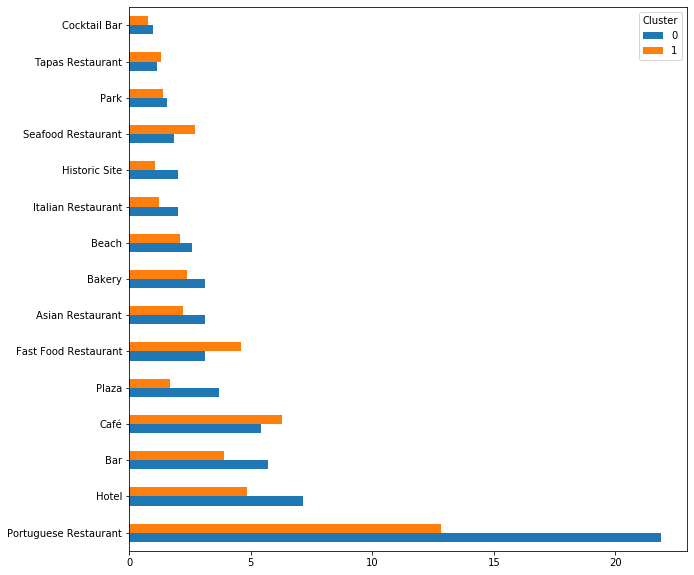

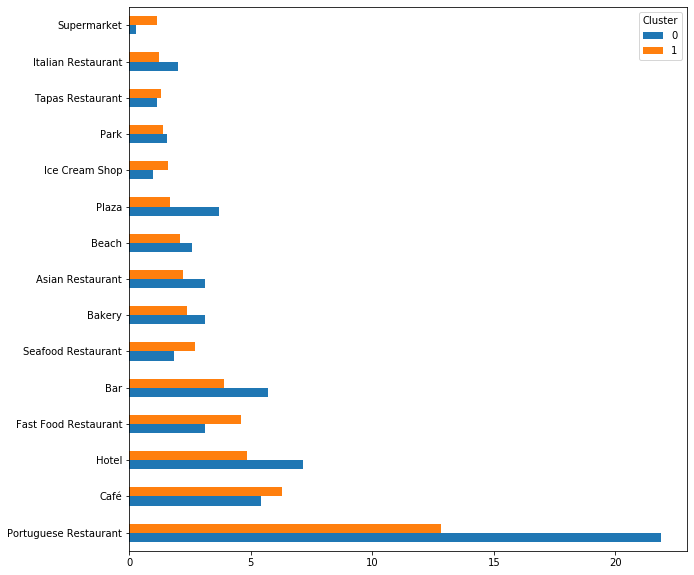

In [130]:
KM20.plot.barh(figsize=(10,10))
KM10.plot.barh(figsize=(10,10))
plt.savefig('fig5.jpeg')

# Conclusions 

Conclusions
The analysis of the twenty cities shows that Portuguese restaurants are the most represented business in practically all cities. For this reason, I believe that investing in catering will have a high risk of failure.
Given the results of K-means clustering and the prior knowledge of each city, I can conclude that cities in cluster "1" have more potential to invest. These cities receive thousands of tourists annually, but also many business visitors. Venues found on average a lower number compared to cities in cluster "0", ie there is potential for investment growth.
In short, given the results I recommend that the investment made in the construction of a hotel in the cities of Faro and especially Porto.